## Project: Decision Tracker
## Making informed decisions based on personal data
**Source:** Own files

### 1. Setting up environment

#### 1.1 Importing packages & setting-up parameters

In [8]:
# Import parent directory (main project directory)
# for packages importing
import sys
import os

# Getting the parent directory name in which your script is running
parent = os.path.dirname(os.path.realpath('/'))

# adding the parent directory to
# the sys.path.
sys.path.append(parent)

# now we can import the module in the parent
# directory.

In [9]:
import requests # to download data from api
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pathlib # for path functions
import numpy as np

import sqlite3
import seaborn as sns

#turning on plot display in JN
%matplotlib inline 
# Setting pandas display options
pd.options.display.max_columns = 300
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 250

In [10]:
# PARAMETERS
plt.style.use('fivethirtyeight')

In [11]:
DataFolderPath = pathlib.Path(os.path.dirname(os.path.realpath(''))).parent
print(DataFolderPath)

C:\Users\tgusc\Documents\GitHub


In [12]:
# filename = 'Wydatki_2021.xlsx'
# file = os.path.join(DataFolderPath, 'Private', filename)

In [13]:
# Unused SQL Queries - move to beggining


# 3. Przygotowanie agregacji danych
# Miesięczne wpływy
# query_monthly_income = "SELECT Rok, Miesiac, Kategoria, SUM(Cena) AS Wplywy FROM transactions WHERE Rodzaj = 'Credit' GROUP BY Rok, Miesiac, Kategoria"
# monthly_income_by_type = pd.read_sql(query_monthly_income, conn)

# Miesięczne wydatki
# query_monthly_expenses = "SELECT Rok, Miesiac, Kategoria, SUM(Cena) AS Wydatki FROM transactions WHERE Rodzaj = 'Debit' GROUP BY Rok, Miesiac, Kategoria"
# monthly_expenses_by_type = pd.read_sql(query_monthly_expenses, conn)

# Miesięczne przepływy
# query_monthly_flow = "SELECT Rok, Miesiac, SUM(Case When Rodzaj = 'Credit' THEN Cena ELSE 0 END) as Wplywy, SUM(Case When Rodzaj = 'Debit' THEN Cena ELSE 0 END) as Wydatki FROM transactions GROUP BY Rok, Miesiac"
# monthly_flow = pd.read_sql(query_monthly_flow, conn)
# monthly_flow["Przeplywy"] = monthly_flow["Wplywy"] + monthly_flow["Wydatki"]

# Analiza miesięcznej struktury wydatków
# monthly_expenses_by_type['Procent'] = monthly_expenses_by_type.groupby(['Rok', 'Miesiac'])['Wydatki'].transform(lambda x: x / x.sum() * 100)

# 4. Przygotowanie danych kumulatywnych
# Kumulacyjne wpływy
# monthly_income_by_type['Kumulacyjne_Wplywy'] = monthly_income_by_type.groupby(['Rok', 'Kategoria'])['Wplywy'].cumsum()

# Kumulacyjne wydatki
# monthly_expenses_by_type['Kumulacyjne_Wydatki'] = monthly_expenses_by_type.groupby(['Rok', 'Kategoria'])['Wydatki'].cumsum()

# Kumulacyjne przepływy
# monthly_flow['Kumulacyjne_Wplywy'] = monthly_flow.groupby('Rok')['Wplywy'].cumsum()
# monthly_flow['Kumulacyjne_Wydatki'] = monthly_flow.groupby('Rok')['Wydatki'].cumsum()
# monthly_flow['Kumulacyjne_Przeplywy'] = monthly_flow['Kumulacyjne_Wplywy'] + monthly_flow['Kumulacyjne_Wydatki']

# Kumulacyjna analiza struktury wydatków
# cumulative_expenses_sum = monthly_expenses_by_type.groupby(['Rok', 'Miesiac'])['Kumulacyjne_Wydatki'].sum().reset_index()
# cumulative_expenses_sum = cumulative_expenses_sum.rename(columns={'Kumulacyjne_Wydatki': 'Suma_Kumulacyjnych_Wydatkow'})
# cumulative_expenses_structure = pd.merge(monthly_expenses_by_type, cumulative_expenses_sum, on=['Rok', 'Miesiac'])
# cumulative_expenses_structure['Procent_Kumulacyjny'] = cumulative_expenses_structure['Kumulacyjne_Wydatki'] / cumulative_expenses_structure['Suma_Kumulacyjnych_Wydatkow'] 


In [14]:
def import_bills(filename, sheet_name):
    # Necessary requirements - DataFolderPath
    file = os.path.join(DataFolderPath, 'Private', filename)
    data_in = pd.read_excel(file, sheet_name = sheet_name , decimal=',')
    data_out = data_in
    data_out["LP"] = data_in["LP"].astype(np.int32)
    data_out["Rok"] = data_in["Rok"].astype(np.int32)
    data_out["Miesiac"] = data_in["Miesiac"].astype(np.int32)
    data_out["Data"] = pd.to_datetime(data_in["Data"])
    data_out["Cena"] = data_in["Cena"].replace(',','.').astype(float)
    if "Nr koszyka" in data_in.columns:
        data_out["Nr koszyka"] = data_in["Nr koszyka"].astype(str)

    # Cleaning data
    data_out = data_out[data_out["Rok"] != 1900].copy() # usuwanie wierszy bez dat
    data_out = data_out[data_out["Kategoria"].notna()].copy()

    def clean_category(category):
        return category.lower().strip()

    # Oczyszczanie nazw kategorii
    data_out['Kategoria'] = data_out['Kategoria'].apply(clean_category)

    print(data_out.tail()) # sample check
    return data_out



In [15]:
wydatki = import_bills(filename = 'Wydatki_2021.xlsx', sheet_name = 'Wydatki')

        LP       Data                     Przedmiot      Cena Waluta  \
4820  4754 2023-08-09   Pensja SCS Expert - 2023-08  29319.07    PLN   
4821  4755 2023-09-22               Youtube Premium    -23.99    PLN   
4822  4756 2023-09-22  Wierzejki - zakupy dla Babci    -17.71    PLN   
4823  4757 2023-09-22           Bilet ZTM 20 min x2     -6.80    PLN   
4824  4758 2023-09-22           Bilet ZTM 20 min x2     -6.80    PLN   

           Sklep                         Miejsce Nr koszyka            Skad  \
4820  SCS Expert                      Alior Bank     3726.0   Alior Firmowa   
4821     Youtube                         Youtube     3727.0  Citi Kredytowa   
4822   Wierzejki             Warszawa Górczewska     3728.0  Citi Kredytowa   
4823         ZTM  Warszawa Metro Księcia Janusza     3696.0   Alior Firmowa   
4824         ZTM  Warszawa Metro Księcia Janusza     3697.0   Alior Firmowa   

        Potrzeba                Kategoria     Grupa   Rok  Miesiac  Rodzaj  \
4820    Potrze

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [16]:
wydatki_wspolne = import_bills(filename = 'Wydatki_2021.xlsx', sheet_name = 'Wydatki_KontoWspolne')

        LP       Data                   Przedmiot   Cena Waluta  \
1201  1202 2023-09-21  Zakupy do Siwka - piwa itp  -4.30    PLN   
1202  1203 2023-09-21  Zakupy do Siwka - piwa itp -35.47    PLN   
1203  1204 2023-09-22               Warzywniaczek -69.54    PLN   
1204  1205 2023-09-22                        Uber -34.25    PLN   
1205  1206 2023-09-22                Uber napiwek  -5.00    PLN   

              Sklep    Kto    Potrzeba                    Kategoria     Grupa  \
1201          Żabka    Ada  Zachcianka  jedzenie i picie: niezdrowe  Grupa IV   
1202          Żabka    Ada  Zachcianka  jedzenie i picie: niezdrowe  Grupa IV   
1203  Warzywniaczek  Tomek    Potrzeba             jedzenie i picie   Grupa I   
1204           Uber  Tomek  Zachcianka                         taxi  Grupa IV   
1205           Uber  Tomek  Zachcianka                         taxi  Grupa IV   

       Rok  Miesiac Rodzaj Komentarz  
1201  2023        9  Debit       NaN  
1202  2023        9  Debit      

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


In [17]:
def sql_sum(data_in):
    # 2. Stworzenie lokalnej bazy danych SQLite
    conn = sqlite3.connect('transactions_db.sqlite')
    data_in.to_sql('transactions', conn, if_exists='replace', index=False)
    conn.commit()

    # Przygotowanie agregacji danych
    query_sum = "SELECT Rok, Miesiac, Rodzaj, Kategoria, SUM(Cena) AS Suma FROM transactions GROUP BY Rok, Miesiac, Kategoria, Rodzaj"
    data_out = pd.read_sql(query_sum, conn)
    print(data_out.tail())
    return data_out

In [18]:
monthly_wydatki = sql_sum(wydatki)

       Rok  Miesiac  Rodzaj                       Kategoria     Suma
1036  2023        9   Debit         rozrywka i przyjemności  -103.98
1037  2023        9   Debit                       transport   -20.40
1038  2023        9   Debit          wspólny rachunek - ada -9565.23
1039  2023        9  Credit  własny rozwój (kursy, zajęcia)  1063.98
1040  2023        9   Debit  własny rozwój (kursy, zajęcia) -4735.45


In [19]:
monthly_wspolne = sql_sum(wydatki_wspolne)

      Rok  Miesiac Rodzaj                       Kategoria    Suma
275  2023        9  Debit         rozrywka i przyjemności -618.99
276  2023        9  Debit                       szastusia -243.17
277  2023        9  Debit                            taxi -168.83
278  2023        9  Debit                       transport  -17.00
279  2023        9  Debit  własny rozwój (kursy, zajęcia)  -40.00


In [20]:
# Unused SQL Queries - move to beggining


# 3. Przygotowanie agregacji danych
# Miesięczne wpływy
# query_monthly_income = "SELECT Rok, Miesiac, Kategoria, SUM(Cena) AS Wplywy FROM transactions WHERE Rodzaj = 'Credit' GROUP BY Rok, Miesiac, Kategoria"
# monthly_income_by_type = pd.read_sql(query_monthly_income, conn)

# Miesięczne wydatki
# query_monthly_expenses = "SELECT Rok, Miesiac, Kategoria, SUM(Cena) AS Wydatki FROM transactions WHERE Rodzaj = 'Debit' GROUP BY Rok, Miesiac, Kategoria"
# monthly_expenses_by_type = pd.read_sql(query_monthly_expenses, conn)

# Miesięczne przepływy
# query_monthly_flow = "SELECT Rok, Miesiac, SUM(Case When Rodzaj = 'Credit' THEN Cena ELSE 0 END) as Wplywy, SUM(Case When Rodzaj = 'Debit' THEN Cena ELSE 0 END) as Wydatki FROM transactions GROUP BY Rok, Miesiac"
# monthly_flow = pd.read_sql(query_monthly_flow, conn)
# monthly_flow["Przeplywy"] = monthly_flow["Wplywy"] + monthly_flow["Wydatki"]

# Analiza miesięcznej struktury wydatków
# monthly_expenses_by_type['Procent'] = monthly_expenses_by_type.groupby(['Rok', 'Miesiac'])['Wydatki'].transform(lambda x: x / x.sum() * 100)

# 4. Przygotowanie danych kumulatywnych
# Kumulacyjne wpływy
# monthly_income_by_type['Kumulacyjne_Wplywy'] = monthly_income_by_type.groupby(['Rok', 'Kategoria'])['Wplywy'].cumsum()

# Kumulacyjne wydatki
# monthly_expenses_by_type['Kumulacyjne_Wydatki'] = monthly_expenses_by_type.groupby(['Rok', 'Kategoria'])['Wydatki'].cumsum()

# Kumulacyjne przepływy
# monthly_flow['Kumulacyjne_Wplywy'] = monthly_flow.groupby('Rok')['Wplywy'].cumsum()
# monthly_flow['Kumulacyjne_Wydatki'] = monthly_flow.groupby('Rok')['Wydatki'].cumsum()
# monthly_flow['Kumulacyjne_Przeplywy'] = monthly_flow['Kumulacyjne_Wplywy'] + monthly_flow['Kumulacyjne_Wydatki']

# Kumulacyjna analiza struktury wydatków
# cumulative_expenses_sum = monthly_expenses_by_type.groupby(['Rok', 'Miesiac'])['Kumulacyjne_Wydatki'].sum().reset_index()
# cumulative_expenses_sum = cumulative_expenses_sum.rename(columns={'Kumulacyjne_Wydatki': 'Suma_Kumulacyjnych_Wydatkow'})
# cumulative_expenses_structure = pd.merge(monthly_expenses_by_type, cumulative_expenses_sum, on=['Rok', 'Miesiac'])
# cumulative_expenses_structure['Procent_Kumulacyjny'] = cumulative_expenses_structure['Kumulacyjne_Wydatki'] / cumulative_expenses_structure['Suma_Kumulacyjnych_Wydatkow'] 


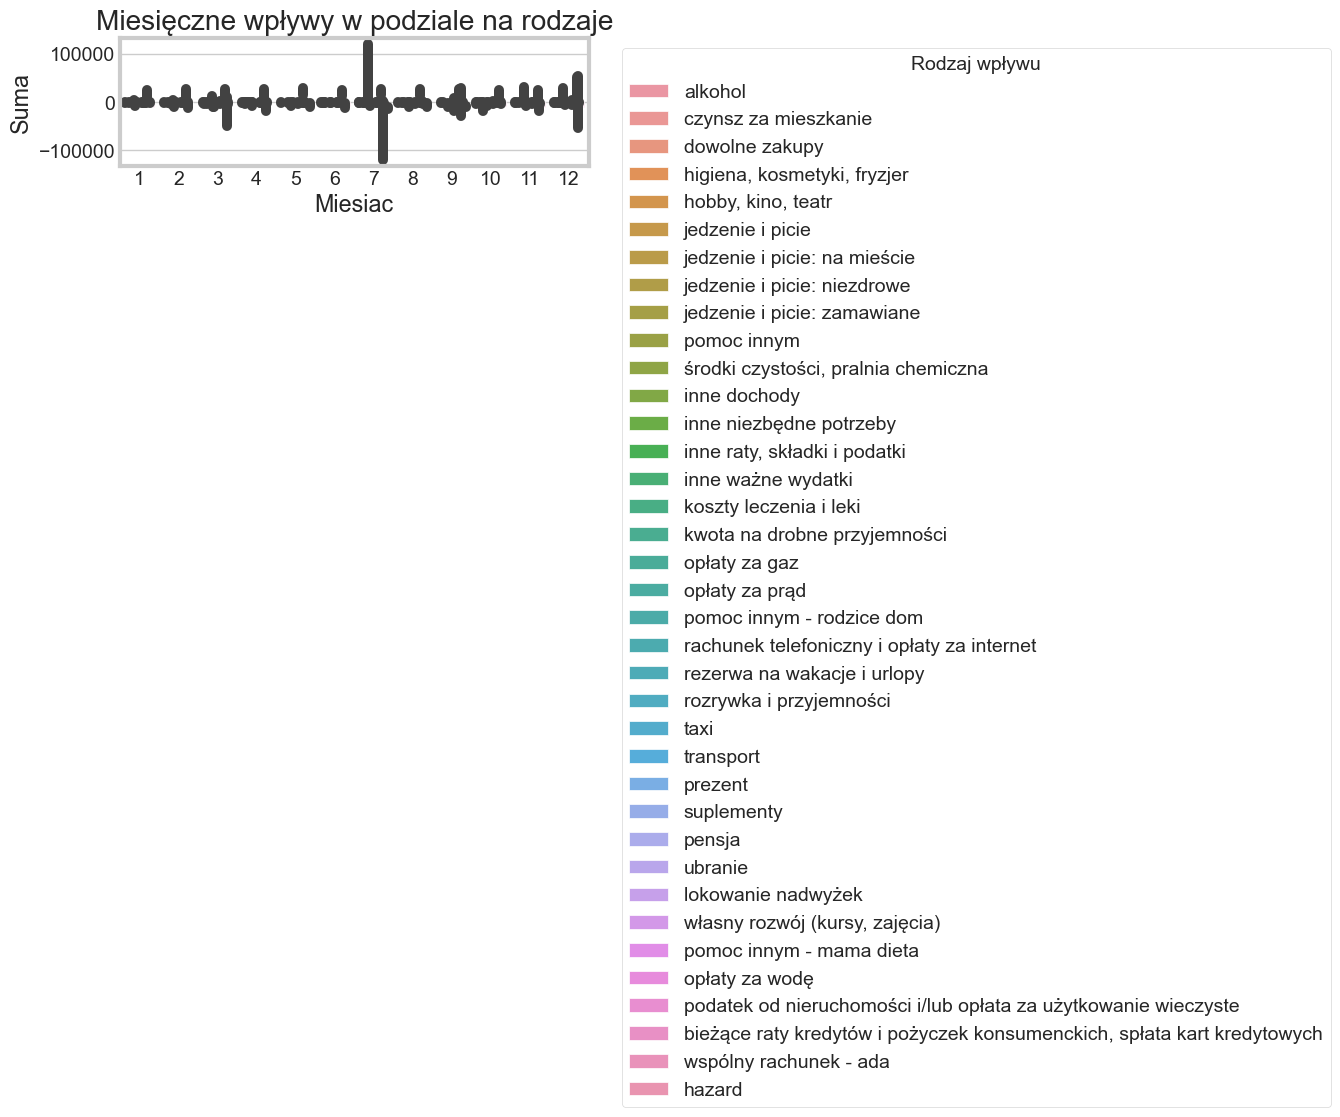

In [21]:
# TBD - moze zostawimy

# 5. Tworzenie wykresów
sns.set_style("whitegrid")

# Wykres miesięcznych wpływów
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_wydatki, x='Miesiac', y='Suma', hue='Kategoria')
plt.title('Miesięczne wpływy w podziale na rodzaje')
plt.legend(title='Rodzaj wpływu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [22]:
# https://www.google.com/search?client=firefox-b-d&q=vs+code+interactive+plots+in+python#ip=1

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [31]:
class WidgetBarPlot():
    def __init__(self, data_in):
        self.data_in = data_in
        self._data_filters()
    
    def _data_filters(self):
        self._years = sorted(self.data_in['Rok'].unique())
        self._months = sorted(self.data_in['Miesiac'].unique())
        self._rodzaje = sorted(self.data_in['Rodzaj'].unique())

        self.default_year = max(self._years )
        self.default_rodzaj = "Debit"
        self.default_month = max(self.data_in[self.data_in['Rok'] == self.default_year]["Miesiac"])

    def _barplot(self, years, months, rodzaje):
        # Filtrujemy dane według wybranych lat, miesięcy i rodzajów transakcji
        data = self.data_in[
            self.data_in['Rok'].isin(years) & 
            self.data_in['Miesiac'].isin(months) & 
            self.data_in['Rodzaj'].isin(rodzaje)
        ].sort_values('Suma')
        
        plt.figure(figsize=(10, 8))
        ax = sns.barplot(data=data, x='Miesiac', y='Suma', hue='Kategoria', order=data['Miesiac'].unique())
        
        # Dodajemy etykiety do słupków
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height()/10), 
                        ha='center', va='center', 
                        xytext=(0, -10), 
                        textcoords='offset points')
        
        plt.title('Miesięczne wpływy/koszty w podziale na kategorie')
        
        # Przenoszenie legendy pod wykres
        ax.legend(title='Kategoria', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
        
        plt.tight_layout()
        plt.show()

    def widget_plot(self):
        # Uaktualnienie widgetu z wielokrotnym wyborem wartości
        widgets.interact(
            self._barplot, 
            years=widgets.SelectMultiple(options=self._years, description='Rok:', value=(self.default_year,)), 
            months=widgets.SelectMultiple(options=self._months, description='Miesiąc:', value=(self.default_month,)),
            rodzaje=widgets.SelectMultiple(options=self._rodzaje, description='Rodzaj:', value=(self.default_rodzaj,))
        )



In [32]:
wydatki_barplot = WidgetBarPlot(data_in = monthly_wydatki)
wydatki_barplot.widget_plot()

interactive(children=(SelectMultiple(description='Rok:', index=(4,), options=(2019, 2020, 2021, 2022, 2023), v…

In [33]:
wspolne_barplot = WidgetBarPlot(data_in = monthly_wspolne)
wspolne_barplot.widget_plot()

interactive(children=(SelectMultiple(description='Rok:', index=(1,), options=(2022, 2023), value=(2023,)), Sel…

In [35]:
class WidgetBarPlot_lastNMonths():
    def __init__(self, data_in):
        self.data_in = data_in
        self._data_params()
    
    def _data_params(self):
        self._categories = sorted(list(set(self.data_in['Kategoria'].unique())))
        self._types = sorted(list(set(self.data_in['Rodzaj'].unique())))
        self._rodzaj = ("Debit",)

        # Znalezienie najdłuższej kategorii
        self._max_length = max(self._categories, key=len)

    def _barplot_lastn(self, categories, last_n_months, rodzaj):
        # Pobieranie najnowszej dostępnej daty
        latest_year = max(self.data_in['Rok'])
        latest_month = max(self.data_in[self.data_in['Rok'] == latest_year]["Miesiac"])
        
        # Określenie zakresu daty na podstawie last_n_months
        end_month = latest_month
        end_year = latest_year
        
        start_month = latest_month - last_n_months + 1
        start_year = latest_year
        while start_month <= 0:
            start_month += 12
            start_year -= 1

        # Filtrujemy dane według wybranego zakresu czasu, rodzaju i kategorii
        filtered_data = self.data_in[
            ((self.data_in['Rok'] > start_year) | 
            ((self.data_in['Rok'] == start_year) & (self.data_in['Miesiac'] >= start_month)) &
            ((self.data_in['Rok'] < end_year) |
            ((self.data_in['Rok'] == end_year) & (self.data_in['Miesiac'] <= end_month)))) &
            (self.data_in['Rodzaj'].isin(rodzaj)) &
            (self.data_in['Kategoria'].isin(categories))
        ]

        # Sumowanie danych dla wybranych kategorii
        summed_data = filtered_data.groupby(['Rok', 'Miesiac']).agg({'Suma': 'sum'}).reset_index()
        
        # Dodawanie kolumny "rok-miesiąc" do summed_data
        summed_data['Rok-Miesiac'] = summed_data['Rok'].astype(str) + "-" + summed_data['Miesiac'].astype(str).str.zfill(2)
        
        plt.figure(figsize=(15, 8))
        
        # Tworzenie wykresu słupkowego
        ax = sns.barplot(data=summed_data, x='Rok-Miesiac', y='Suma')
        
        # Dodawanie etykiet do słupków
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.0f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height() - p.get_height()/10), 
                        ha='center', va='center', 
                        xytext=(0, -10), 
                        textcoords='offset points')
        
        plt.title('Miesięczne wpływy/koszty w podziale na kategorie')
        plt.tight_layout()
        
        plt.show()


    def widget_plot(self):
    # Uruchamiam interaktywną wizualizację
        widgets.interact(
            self._barplot_lastn, 
            categories=widgets.SelectMultiple(
                options=self._categories, 
                description='Kategoria:', 
                layout=widgets.Layout(width=f'{len(self._max_length) * 8 + 20}px', height=f'{int(len(self._categories)*25*0.85)}px'),
                value=self._categories  # Domyślnie zaznacz wszystkie kategorie
            ),
            last_n_months=widgets.Dropdown(options=[3, 6, 9, 12, 18, 24], description='Ostatnie miesiące:', value=6),
            rodzaj=widgets.SelectMultiple(options=self._types, description='Rodzaj:', value=self._rodzaj)
        )


In [36]:
# Do poprawy - parametr last n month - nie odswieza sie

wydatki_lastN = WidgetBarPlot_lastNMonths(data_in = monthly_wydatki)
wydatki_lastN.widget_plot()

interactive(children=(SelectMultiple(description='Kategoria:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [37]:
wspolne_lastN = WidgetBarPlot_lastNMonths(data_in = monthly_wspolne)
wspolne_lastN.widget_plot()

interactive(children=(SelectMultiple(description='Kategoria:', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import clear_output, display

monthly_data['Rok-Miesiac'] = monthly_data['Rok'].astype(str) + '-' + monthly_data['Miesiac'].astype(str).str.zfill(2)

# Ustalanie indeksów dla najnowszego roku w danych
current_year = monthly_data['Rok'].max()
start_idx = monthly_data[monthly_data['Rok'] == current_year]['Rok-Miesiac'].min()
end_idx = monthly_data[monthly_data['Rok'] == current_year]['Rok-Miesiac'].max()

# Widgety
date_range = widgets.SelectionRangeSlider(
    options=sorted(monthly_data['Rok-Miesiac'].unique()),
    index=(monthly_data['Rok-Miesiac'].unique().tolist().index(start_idx), 
           monthly_data['Rok-Miesiac'].unique().tolist().index(end_idx)),
    description='Zakres dat:',
    continuous_update=False,
    layout=widgets.Layout(width='500px')
)

category_selector = widgets.SelectMultiple(
    options=sorted(monthly_data['Kategoria'].unique()),
    value=list(monthly_data['Kategoria'].unique()),
    description='Kategoria:',
    continuous_update=False,
    rows=len(monthly_data['Kategoria'].unique()),
    layout=widgets.Layout(width='1000px')
)

type_selector = widgets.SelectMultiple(
    options=sorted(monthly_data['Rodzaj'].unique()),
    value=['Debit'],
    description='Rodzaj:',
    continuous_update=False,
    rows=len(monthly_data['Rodzaj'].unique())
)

output = widgets.Output()

def update_table(change=None):
    with output:
        clear_output(wait=True)
        filtered_data = monthly_data[
            (monthly_data['Rok-Miesiac'] >= date_range.value[0]) &
            (monthly_data['Rok-Miesiac'] <= date_range.value[1]) &
            (monthly_data['Kategoria'].isin(category_selector.value)) &
            (monthly_data['Rodzaj'].isin(type_selector.value))
        ]
        pivot = filtered_data.pivot_table(index='Kategoria', columns='Rok-Miesiac', values='Suma', aggfunc='sum').fillna(0).sort_index()
        
        # Zaokrąglenie do 2 miejsc po przecinku
        pivot = pivot.round(2)
        
        # Dodanie kolumny "Sum_total"
        pivot['Sum_total'] = pivot.sum(axis=1)
        
        # Dodanie wiersza "TOTAL"
        pivot.loc['TOTAL'] = pivot.sum()
        
        display(pivot)

date_range.observe(update_table, names='value')
category_selector.observe(update_table, names='value')
type_selector.observe(update_table, names='value')

display_widgets = widgets.VBox([date_range, category_selector, type_selector, output])
display(display_widgets)

update_table()


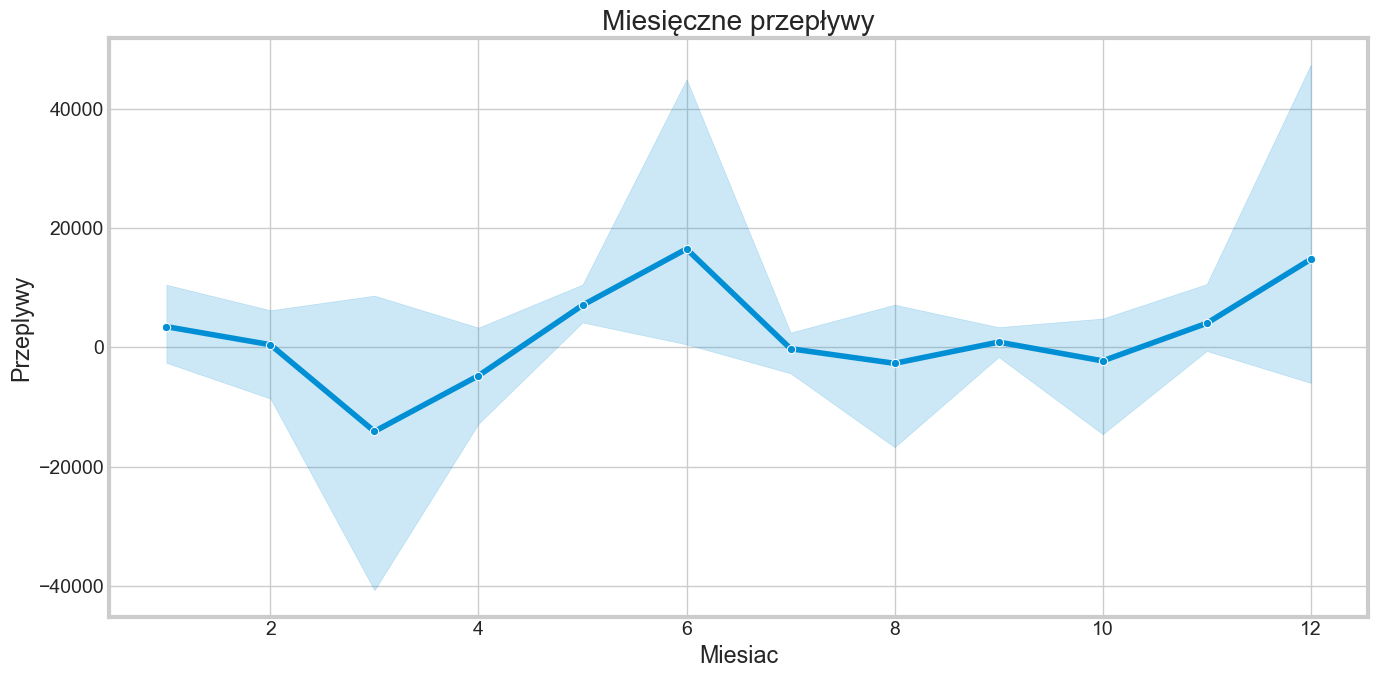

In [ ]:
# Wykres miesięcznych przepływów
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_flow, x='Miesiac', y='Przeplywy', marker="o")
plt.title('Miesięczne przepływy')
plt.tight_layout()
plt.show()


In [ ]:
# Stworzenie lokalnej bazy danych SQLite
conn = sqlite3.connect('transactions_db_temp.sqlite')
df.to_sql('transactions', conn, if_exists='replace', index=False)

# Przygotowanie agregacji danych
query_monthly_expenses = """
SELECT Rok, Miesiac, Kategoria, SUM(Cena) AS Wydatki 
FROM transactions WHERE Rodzaj = 'Debit' 
GROUP BY Rok, Miesiac, Kategoria
"""

monthly_expenses_by_type = pd.read_sql(query_monthly_expenses, conn)

# Poprawione obliczenie procentowego udziału kategorii w miesięcznych wydatkach
monthly_expenses_by_type['Procent'] = monthly_expenses_by_type.groupby(['Rok', 'Miesiac'])['Wydatki'].transform(lambda x: x / x.sum() * 100)

# Tworzenie monthly_expenses_structure
cumulative_expenses_sum = monthly_expenses_by_type.groupby(['Rok', 'Miesiac'])['Wydatki'].sum().reset_index()
cumulative_expenses_sum = cumulative_expenses_sum.rename(columns={'Wydatki': 'Suma_Wydatkow'})
monthly_expenses_structure = pd.merge(monthly_expenses_by_type, cumulative_expenses_sum, on=['Rok', 'Miesiac'])
monthly_expenses_structure['Procent_Struktury'] = monthly_expenses_structure['Wydatki'] / monthly_expenses_structure['Suma_Wydatkow'] * 100

monthly_expenses_structure.head(10)

,Rok,Miesiac,Kategoria,Wydatki,Procent,Suma_Wydatkow,Procent_Struktury
0,2019,11,alkohol,-120.86,9.804256,-1232.73,9.804256
1,2019,11,czynsz za mieszkanie,-517.74,41.999465,-1232.73,41.999465
2,2019,11,dowolne zakupy,-0.45,0.036504,-1232.73,0.036504
3,2019,11,"higiena, kosmetyki, fryzjer",-6.99,0.567034,-1232.73,0.567034
4,2019,11,"hobby, kino, teatr",-29.70,2.409287,-1232.73,2.409287
5,2019,11,jedzenie i picie,-185.25,15.027622,-1232.73,15.027622
6,2019,11,jedzenie i picie: na mieście,-182.33,14.790749,-1232.73,14.790749
7,2019,11,jedzenie i picie: niezdrowe,-16.57,1.344171,-1232.73,1.344171
8,2019,11,jedzenie i picie: zamawiane,-139.86,11.345550,-1232.73,11.345550
9,2019,11,pomoc innym,-24.37,1.976913,-1232.73,1.976913
